In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

##### Import Libraries

In [32]:
import pandas as pd
import numpy as np

##### Read Data

In [78]:
df = pd.read_csv('ec2_cpu_utilization.csv')
df.sample(5)

,timestamp,value
3819,2014-02-27 20:45:00,1.806
3469,2014-02-26 15:35:00,1.766
3787,2014-02-27 18:05:00,1.824
93,2014-02-14 22:15:00,1.966
835,2014-02-17 12:05:00,1.794


##### Data PreProcessing

In [79]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')

##### Z-score
with three standard deviations away from the mean

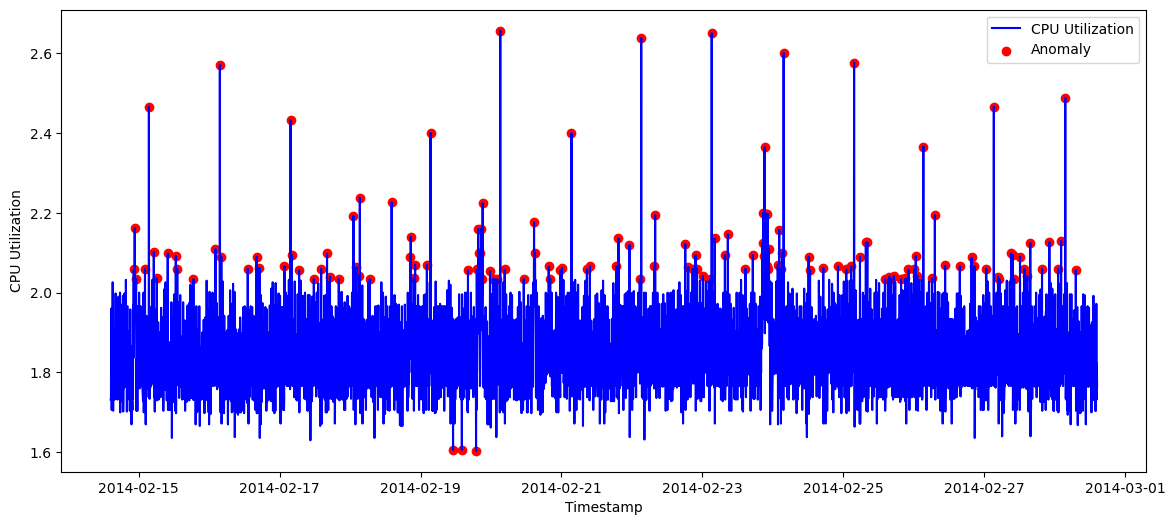

In [86]:
from scipy.stats import zscore

df['zscore'] = zscore(df['value'])
threshold = 2 # How many standard deviations a data point is away from the mean
df['anomaly'] = (df['zscore'].abs() > threshold)

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.plot(df['timestamp'], df['value'], label='CPU Utilization', color='blue')
plt.scatter(df.loc[df['anomaly'], 'timestamp'], 
            df.loc[df['anomaly'], 'value'], 
            color='red', label='Anomaly')
plt.xlabel('Timestamp')
plt.ylabel('CPU Utilization')
plt.legend()
plt.show()

In [87]:
df.sample(10)

,timestamp,value,zscore,anomaly
1247,2014-02-18 22:25:00,1.772,-0.567350,False
1074,2014-02-18 08:00:00,1.806,-0.232195,False
3835,2014-02-27 22:05:00,1.832,0.024101,False
1709,2014-02-20 12:55:00,1.794,-0.350485,False
1911,2014-02-21 05:45:00,1.740,-0.882791,False
3334,2014-02-26 04:20:00,1.706,-1.217947,False
349,2014-02-15 19:35:00,1.774,-0.547635,False
48,2014-02-14 18:30:00,1.860,0.300112,False
1496,2014-02-19 19:10:00,2.058,2.251901,True
1295,2014-02-19 02:25:00,1.772,-0.567350,False
